# Optymalizacja hiperparametrów

Wczytanie potrzebnych bibliotek

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb 

import warnings
import sklearn

from sklearn.metrics import roc_auc_score, accuracy_score # wczytanie metryk sukcesu
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 250
seed = 2019
warnings.simplefilter("ignore")

print('numpy ' + str(np.__version__))
print('pandas ' + str(pd.__version__))
print('seaborn ' + str(pd.__version__))
print('xgboost ' + str(pd.__version__))
print('sklearn ' + str(sklearn.__version__))

numpy 1.21.6
pandas 1.3.5
seaborn 1.3.5
xgboost 1.3.5
sklearn 1.0.2


Wczytanie pliku z danymi. W poniższym przykładzie użyłem danych z konkursu Kaggle: <br> 
https://www.kaggle.com/c/santander-customer-transaction-prediction/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
df=pd.read_csv('drive/My Drive/DS Bootcamp 14-15.05/Zaawansowane problemy klasyfikacji/dataset/santander/train.csv')
print(df.shape)
df.head()

Mounted at /content/drive
(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

#### Funkcje pomocnicze

In [ ]:
def get_feats(df): #dzieki temu nie będę brał niepotrzebnych kolumn do modelowania
    feats = [f for f in df.columns if f not in ['ID_code','target']]
    return feats

def get_X(df): #do pobierania macierzy X czyli cech które będę starał się opisywac modelem
    return df[ get_feats(df) ].values

def get_y(df, target_var='target'): #wektor y - informacja o predycji. w przypadku przykładowych danych to ":target"
    return df[target_var].values

#### Podział zbioru do nauki modelu, testowy i walidacyjny

In [ ]:
X, y = get_X(df), get_y(df) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2019)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2019)

print('TRAIN:',X_train.shape, y_train.shape)
print('TEST:',X_test.shape, y_test.shape)
print('VALIDATION:',X_val.shape, y_val.shape)

TRAIN: (120000, 200) (120000,)
TEST: (40000, 200) (40000,)
VALIDATION: (40000, 200) (40000,)


#### Walidacja modelu
Zdefiniujmy sobie funkcję dzięki którym od razu sprawdzimy jak model działa.<br>
W tym przypadku przyglądnijmy się metryce GINI.

In [ ]:
def create_measures(y,y_pred): 
    score_test = roc_auc_score(y, y_pred)
    Gini_index = 2*score_test - 1
    
    d = {'AUC': [round(score_test,4)], 'GINI': [round(Gini_index,4)]}
    d = pd.DataFrame.from_dict(d)
    return d

def calculating_metrics(X_train, X_val, X_oot, y_train, y_val, y_oot):
    train = create_measures(y_train,model.predict_proba(X_train)[:, 1])
    test = create_measures(y_test,model.predict_proba(X_test)[:, 1])
    val = create_measures(y_val,model.predict_proba(X_val)[:, 1]) 

    measures =  pd.concat([train,test,val]).set_index([pd.Index(['TRAIN', 'TEST', 'VAL'])]) 
    
    return measures

#### Budowa modelu XGB na domyślnych parametrach

In [ ]:
model = xgb.XGBClassifier(tree_method='gpu_hist')
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.8618,0.7236
TEST,0.8271,0.6542
VAL,0.8271,0.6542


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param = {  
    'n_estimators': [50, 60, 70 ,80],
    'max_depth': [5,6,7,8],
    'learning_rate': [ 0.1, 0.25,0.5, 1],
    'subsample': [0.75, 1.00], 
    'tree_method': ['gpu_hist']    
}

In [ ]:
print(4*4*4*2)

128


In [ ]:
grid_search = GridSearchCV(estimator=model,  
                     param_grid=grid_param,
                     scoring='roc_auc')

In [ ]:
grid_search.fit(X_train, y_train) 

best_parameters = grid_search.best_params_  
print(best_parameters) 

{'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 60, 'subsample': 1.0, 'tree_method': 'gpu_hist'}


In [ ]:
model = xgb.XGBClassifier(**best_parameters)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.9335,0.8670
TEST,0.8443,0.6885
VAL,0.8443,0.6885


In [ ]:
GS_results = pd.DataFrame(grid_search.cv_results_)
GS_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,param_tree_method,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.936993,0.075274,0.059184,0.002080,0.1,5,50,0.75,gpu_hist,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.812332,0.817356,0.813766,0.815552,0.803786,0.812558,0.004700,7
1,0.904444,0.006428,0.057294,0.000719,0.1,5,50,1.0,gpu_hist,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.806909,0.817084,0.808849,0.816815,0.802629,0.810457,0.005671,8
2,1.002992,0.004695,0.060305,0.000624,0.1,5,60,0.75,gpu_hist,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.822397,0.829069,0.825373,0.827165,0.813493,0.823500,0.005465,5
3,0.995117,0.001779,0.061451,0.002128,0.1,5,60,1.0,gpu_hist,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.817673,0.826688,0.818666,0.824421,0.814275,0.820345,0.004553,6
4,0.912639,0.003548,0.058318,0.002285,0.25,5,50,0.75,gpu_hist,"{'learning_rate': 0.25, 'max_depth': 5, 'n_est...",0.835176,0.841091,0.840037,0.844635,0.829123,0.838012,0.005376,3


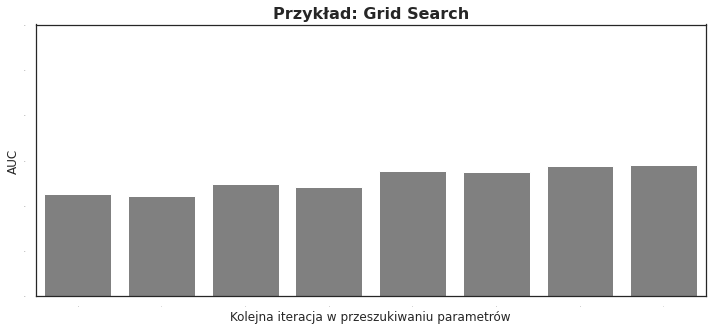

In [ ]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=GS_results.index, y='mean_test_score', data=GS_results, color="gray")

ax.set_title("Przykład: Grid Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

Zad.5. Użyj metody GridSearchCV wybierajac zakres hiperparametrów dla modelu Xgboost i SVM (iloczyn liczby wszystkich kombinacji w gridsearch nie powinien przekroczyć 25). Wykonaj to na zbiorze breast_cancer.csv używając funkcji prepare_dataset, replace (aby pozbyć się '?') oraz standard_scaler aby przeskalować dane (patrz skrypt Zespoły klasyfikatorów), jako odp zapisz Gini dla SVM i Gini dla Xgboost z najlepszymi paraemtrami zwróconymi przez GridSearchCV. Zwróć na czas wykonywania.

### Random Search

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
random_param = {
    'max_depth': range(1,9),
    'learning_rate': np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000),
    'n_estimators': range(100, 1000, 50),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': range(1,100,5),
    'subsample': np.linspace(0.5, 1, 101),
    'colsample_bytree': np.linspace(0.5, 1, 101),
    'colsample_bylevel': np.linspace(0.5, 1, 101),
    'reg_alpha': np.linspace(0, 2),
    'reg_lambda': np.linspace(0, 2),
    'tree_method': ['gpu_hist']
}

In [ ]:
random_param1 = {
    'n_estimators': [50, 60],
    'max_depth': [5],
    'learning_rate': [ 0.1, 0.25],
    'subsample': [0.75, 1.00], 
    'tree_method': ['gpu_hist'] 
}

In [24]:
model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=model
                                 , param_distributions=random_param
                                 , scoring='roc_auc' )

In [25]:
random_search.fit(X=X_train, y=y_train)

best_parameters = random_search.best_params_  
print(best_parameters) 

{'tree_method': 'gpu_hist', 'subsample': 0.625, 'reg_lambda': 2.0, 'reg_alpha': 0.9795918367346939, 'n_estimators': 900, 'min_child_weight': 81, 'max_depth': 3, 'learning_rate': 0.10478311997402164, 'gamma': 0.1111111111111111, 'colsample_bytree': 0.765, 'colsample_bylevel': 0.8500000000000001}


In [26]:
model = xgb.XGBClassifier(**best_parameters)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.9364,0.8727
TEST,0.8927,0.7855
VAL,0.8927,0.7855


In [ ]:
RS_results = pd.DataFrame(random_search.cv_results_)
RS_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_method,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.022802,0.322609,0.053865,0.002333,gpu_hist,0.75,50,5,0.1,"{'tree_method': 'gpu_hist', 'subsample': 0.75,...",0.812332,0.817356,0.813766,0.815552,0.803786,0.812558,0.004700,7
1,0.853097,0.001708,0.052552,0.000722,gpu_hist,1.0,50,5,0.1,"{'tree_method': 'gpu_hist', 'subsample': 1.0, ...",0.806909,0.817084,0.808849,0.816815,0.802629,0.810457,0.005671,8
2,0.951152,0.003370,0.056221,0.001505,gpu_hist,0.75,60,5,0.1,"{'tree_method': 'gpu_hist', 'subsample': 0.75,...",0.822397,0.829069,0.825373,0.827165,0.813493,0.823500,0.005465,5
3,0.943965,0.003702,0.055338,0.000434,gpu_hist,1.0,60,5,0.1,"{'tree_method': 'gpu_hist', 'subsample': 1.0, ...",0.817673,0.826688,0.818666,0.824421,0.814275,0.820345,0.004553,6
4,0.891270,0.043805,0.059326,0.008717,gpu_hist,0.75,50,5,0.25,"{'tree_method': 'gpu_hist', 'subsample': 0.75,...",0.835176,0.841091,0.840037,0.844635,0.829123,0.838012,0.005376,3


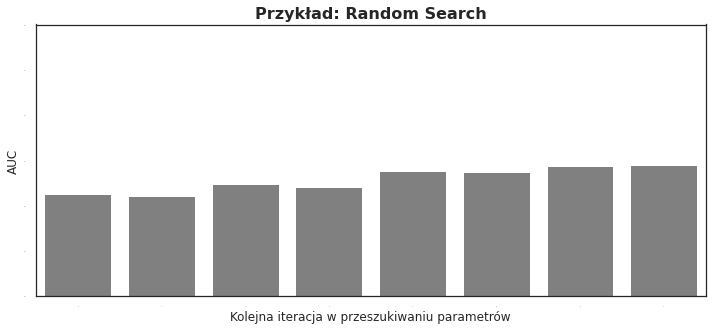

In [16]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=RS_results.index, y='mean_test_score', data=RS_results, color="gray")

ax.set_title("Przykład: Random Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

**Zad.6 Wykonaj klasyfikacje na zbiorze glasses, używając metod GridSearchCV i RandomizedSearchCV ma ustawiać w sposób automatyczny poniższe parametry:subsample, colsample_bytree, colsample_bylevel, max_deltastep, alfa, lambda, n_estimators, max_depth,learning_rate. Która metoda daje lepsze f1_score na zb testowym?**

In [17]:
!git clone https://github.com/matzim95/ML-datasets
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'breast_cancer' : {'class_column' : 'Class', 'index_col': 'Sample code number'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 23.54 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [18]:
X, y, classes = prepare_dataset('glass')

In [19]:
from sklearn.preprocessing import Normalizer, StandardScaler

standarizer = StandardScaler()

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [20]:
X = preprocess_data(X, standarizer)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
    
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots()
    # rysuje CM (confusion matrix)
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

### Baysian Search

In [28]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, partial # procedury do optymalizacji hiperparametrów

In [29]:
# parametr mówiący ile iteracji najpierw losujemy zanim zaczniemy optymalizować parametry
n_startup_jobs = 4*4*2*1 # liczba całkowita > 0

# parametr ile łącznie robimy iteracji 
max_evals = 4*4*4*2 # liczba całkowita > n_startup_jobs

BS_results = []

In [30]:
# Określenie zakresu do przeszukiwania dla hiperparametrów.
# Można modyfikować dowolnie według uznania
space ={
    'learning_rate': hp.uniform ('x_learning_rate', 0.01, 0.5),
    'max_depth': hp.quniform ('x_max_depth', 1, 9, 1),
    'n_estimators': hp.quniform ('x_n_estimators', 100, 1000, 50),
    'min_child_weight': hp.quniform ('x_min_child_weight', 0, 100, 1),
    'gamma': hp.loguniform ('x_gamma', 0.0, 2.0),
    'subsample': hp.uniform ('x_subsample', 0.5, 1.0),    
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.5, 1.0),
    'colsample_bylevel': hp.uniform ('x_colsample_bylevel', 0.5, 1.0),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0.0, 2.0),
    'reg_lambda': hp.loguniform ('x_reg_lambda', 0.0, 2.0),
}

In [31]:
def objective(space):
    xgb_params = {
        # ogólne
        'learning_rate': space['learning_rate'],
        'max_depth': int(space['max_depth']),
        'n_estimators': int(space['n_estimators']),
        'min_child_weight': int(space['min_child_weight']),
        'gamma': space['gamma'],
        'seed': 2019,
        # do walki z overfiting
        'subsample': space['subsample'],
        'colsample_bytree': space['colsample_bytree'],
        'colsample_bylevel': space['colsample_bylevel'],
        # regularyzacja
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        # pozostałe
        'metric': 'auc',  
        'eval_metric': 'auc', 
        'tree_method': 'gpu_hist'
    }

    model = xgb.XGBClassifier(**xgb_params)
    %time model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    
    score = - roc_auc_score(y_test, y_pred)
    
    BS_results.append([roc_auc_score(y_test, y_pred), xgb_params])
    
    print("SCORE: {0}".format(roc_auc_score(y_test, y_pred)))
    
    return{'loss':score, 'status': STATUS_OK }

<div class="alert alert-block alert-danger">
UWAGA! Hyperopt szuka minimum. Zatem jak Twoja metryka im wyższa tym lepiej (jak AUC) wówczas należy przemnożyć ją przez -1 jak w powyższym przykładzie:  score = - roc_auc_score(y_test, y_pred).<br>
</div>

In [32]:
trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)

print("The best params: ", best_params)

CPU times: user 2.27 s, sys: 49 ms, total: 2.32 s
Wall time: 2.31 s
SCORE: 0.8773768764223815
CPU times: user 6.87 s, sys: 41.8 ms, total: 6.91 s
Wall time: 6.88 s
SCORE: 0.8814369415576407
CPU times: user 5.83 s, sys: 34 ms, total: 5.86 s
Wall time: 5.84 s
SCORE: 0.8950173348355924
CPU times: user 7.17 s, sys: 47.8 ms, total: 7.22 s
Wall time: 7.18 s
SCORE: 0.8886334102680523
CPU times: user 6.36 s, sys: 51.9 ms, total: 6.41 s
Wall time: 6.4 s
SCORE: 0.8704283294936043
CPU times: user 5.34 s, sys: 51 ms, total: 5.39 s
Wall time: 5.4 s
SCORE: 0.8677090690478593
CPU times: user 2.02 s, sys: 43 ms, total: 2.06 s
Wall time: 2.06 s
SCORE: 0.8767562731925247
CPU times: user 5.47 s, sys: 44 ms, total: 5.52 s
Wall time: 5.52 s
SCORE: 0.8864435349611542
CPU times: user 2.85 s, sys: 36.1 ms, total: 2.89 s
Wall time: 2.88 s
SCORE: 0.8869383905649166
CPU times: user 5.18 s, sys: 37.1 ms, total: 5.22 s
Wall time: 5.21 s
SCORE: 0.8402172880301348
CPU times: user 3.51 s, sys: 41 ms, total: 3.55 s
Wa

In [33]:
import pandas as pd
BS_results = pd.DataFrame(BS_results)
BS_results.columns = ['score','params']
BS_results.head()

,score,params
0,0.877377,"{'learning_rate': 0.12958922128560815, 'max_de..."
1,0.881437,"{'learning_rate': 0.029199965260360262, 'max_d..."
2,0.895017,"{'learning_rate': 0.35408645403660893, 'max_de..."
3,0.888633,"{'learning_rate': 0.08560090275534471, 'max_de..."
4,0.870428,"{'learning_rate': 0.2796319053576801, 'max_dep..."


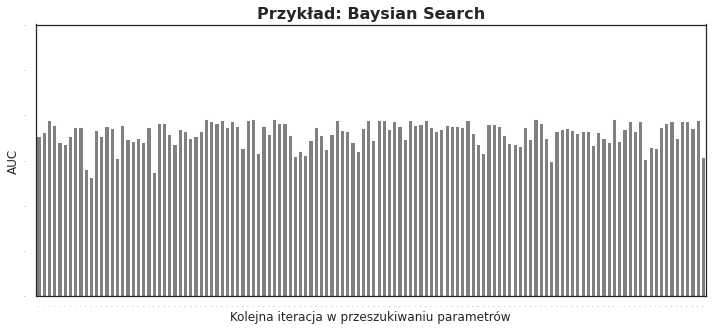

In [34]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=BS_results.index, y='score', data=BS_results, color="gray")

ax.set_title("Przykład: Baysian Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

In [35]:
best_params

{'x_colsample_bylevel': 0.5161800880989378,
 'x_colsample_bytree': 0.7364218035627659,
 'x_gamma': 1.0150296470106928,
 'x_learning_rate': 0.39895120271839896,
 'x_max_depth': 1.0,
 'x_min_child_weight': 78.0,
 'x_n_estimators': 800.0,
 'x_reg_alpha': 1.0946321938713126,
 'x_reg_lambda': 4.311020300818829,
 'x_subsample': 0.6819078016579452}

In [36]:
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.8634,0.7268
TEST,0.8263,0.6526
VAL,0.8263,0.6526


In [38]:
#GS_results.to_csv('GS_results.csv')
RS_results.to_csv('RS_results.csv')
BS_results.to_csv('BS_results.csv')